## Feature Scaling and Normalization

An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

$$X_{norm}=\frac{X-X_{min}}{X_{max} - X_{min}} $$

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/wine_data.csv',header=None,usecols=[0,1,2])

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [2]:
from sklearn import preprocessing

#standard scale transform
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

#min max scale transform
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


Plot to show the standardized and normalized data points

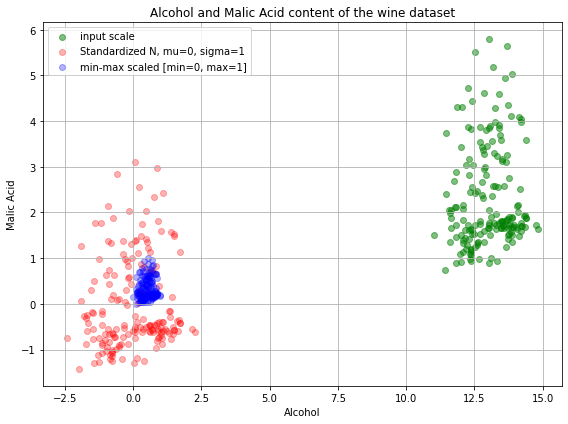

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', label='Standardized N, mu=0, sigma=1', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show();

### Exercise 5

Use the ``MinMaxScaler`` to normalized the following dataframe

In [4]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=(range(6)))
s2 = pd.Series([10, 9, 8, 7, 6, 5], index=(range(6)))
df = pd.DataFrame(dict(s1=s1,s2=s2), columns=['s1','s2'])
df.head()

,s1,s2
0,1,10
1,2,9
2,3,8
3,4,7
4,5,6


In [26]:
# Output should be like this
# 1st transform
# reverse transform

[[ 0.   1. ]
 [ 0.2  0.8]
 [ 0.4  0.6]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 1.   0. ]]
[[  1.  10.]
 [  2.   9.]
 [  3.   8.]
 [  4.   7.]
 [  5.   6.]
 [  6.   5.]]


In [22]:
# min max scale ft, transform
minmax_scale = preprocessing.MinMaxScaler().fit(df[['s1', 's2']])
df_minmax = minmax_scale.transform(df[['s1', 's2']])
print(df_minmax)

# min max scale fit_transform in 1 step
df_minmax = preprocessing.MinMaxScaler().fit_transform(df[['s1', 's2']])
print(df_minmax)


# inverse transform
print(minmax_scale.inverse_transform(df_minmax))

[[0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]
[[0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]
[[ 1. 10.]
 [ 2.  9.]
 [ 3.  8.]
 [ 4.  7.]
 [ 5.  6.]
 [ 6.  5.]]
